In [57]:
cnx.close()

In [58]:
import nepc
from nepc.util import plotter
from nepc.util import config
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [59]:
pd.set_option('max_colwidth', 120)

In [60]:
cnx, cursor = nepc.connect(local=True)

In [61]:
nepc.count_table_rows(cursor, "states")

55

In [62]:
states = nepc.table_as_df(cursor, "states")
states

,0,1,2,3
0,1,4,N++,N${}^{++}$
1,2,3,N+,N${}^+$
2,3,3,N+_2s22p2_3P,N${}^+$ ($2s^22p^2$ ${}^3P$)
3,4,3,N+_2s12p3_1D,N${}^+$ ($2s^22p^2$ ${}^1D$)
4,5,3,N+_2s12p3_1S,N${}^+$ ($2s^22p^2$ ${}^1S$)
5,6,6,N2+,N${}_2^+$
6,7,6,N2+(C2Sigmau+),N${}^+_2$ (C ${}^2\Sigma_u^+$)
7,8,6,N2+(C2Sigmau+),N${}^+_2$ (C ${}^2\Sigma_u^+$)
8,9,6,N2+(B2Sigmau+),N${}^+_2$ (B ${}^2\Sigma_u^+$)
9,10,6,N2+(B2Sigmau+),N${}^+_2$ (B ${}^2\Sigma_u^+$)


In [63]:
species = nepc.table_as_df(cursor, "species")
species

,0,1,2
0,1,N,N
1,2,N-,N$^-$
2,3,N+,N$^+$
3,4,N++,N$^{++}$
4,5,N2,N$_2$
5,6,N2+,N$_2^+$


In [64]:
NEPC_HOME = config.nepc_home()

In [65]:
models = nepc.table_as_df(cursor, "models")
models

,0,1,2,3
0,1,n_b,nitrogen baseline,\N
1,2,n_eb1,nitrogen extended baseline #1,\N
2,3,abc,Advanced Breakdown Conductivity model developed by J. Angus (2016),angus2016


In [9]:
processes = nepc.table_as_df(cursor, "processes")
processes

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,elastic,Total elastic electron scattering,1,1,1,1,0,0,0,0,0,0
1,2,elastic_partial,Partial elastic electron scattering,1,1,1,1,0,0,0,0,0,0
2,3,excitation,"Excitation of atoms (electronic), inelastic electron scattering",1,1,1,1,0,0,0,0,0,0
3,4,excitation_v,"Excitation of atoms (electronic + vibrational), inelastic electron scattering",1,1,1,1,0,0,1,1,0,0
4,5,excitation_j,"Excitation of atoms (electronic + rotational), inelastic electron scattering",1,1,1,1,0,0,0,0,1,1
5,6,excitation_vj,"Excitation of atoms (electronic + vibrational + rotational), inelastic electron scattering",1,1,1,1,0,0,1,1,1,1
6,7,s_deexcitation,Spontaneous de-excitation,1,1,0,0,0,1,0,0,0,0
7,8,s_deexcitation_v,Spontaneous de-excitation (vibrational),1,1,0,0,0,1,1,1,0,0
8,9,s_deexcitation_j,Spontaneous de-excitation (rotational),1,1,0,0,0,1,0,0,1,1
9,10,s_deexcitation_vj,Spontaneous de-excitation (vibrational and rotational),1,1,0,0,0,1,1,1,1,1


In [10]:
nepc.cs_e_sigma(cursor,1)

([14.54,
  17.5,
  20.0,
  25.0,
  30.0,
  40.0,
  50.0,
  60.0,
  70.0,
  80.0,
  90.0,
  100.0,
  125.0,
  150.0,
  200.0],
 [0.0,
  0.1362,
  0.25565,
  0.47867,
  0.70708,
  1.06851,
  1.28736,
  1.41708,
  1.49606,
  1.54735,
  1.57529,
  1.58483,
  1.56417,
  1.50594,
  1.33618])

In [25]:
n_eb1 = nepc.Model(cursor, "n_eb1")

In [26]:
type(n_eb1)

nepc.nepc.Model

In [27]:
len(n_eb1.cs)

22

In [28]:
n_eb1.cs[0]

{'cs_id': 1,
 'specie': 'N',
 'process': 'ionization_partial',
 'units_e': 1.0,
 'units_sigma': 1.0000000000000001e-20,
 'ref': 'wang2014',
 'lhsA': 'N_2s22p3_4So',
 'lhsB': None,
 'rhsA': 'N+',
 'rhsB': None,
 'wavelength': -1.0,
 'lhs_v': -1,
 'rhs_v': -1,
 'lhs_j': -1,
 'rhs_j': -1,
 'background': 'From BSR calculations. Raw data provided by Zatsarinny.  Used predominate electronic state for N+ on RHS (ground state); however, there is significant 2s-ionization above 20 eV with ~15% contribution at 100 eV.',
 'lpu': -1.0,
 'upu': -1.0,
 'e': [14.54,
  17.5,
  20.0,
  25.0,
  30.0,
  40.0,
  50.0,
  60.0,
  70.0,
  80.0,
  90.0,
  100.0,
  125.0,
  150.0,
  200.0],
 'sigma': [0.0,
  0.1362,
  0.25565,
  0.47867,
  0.70708,
  1.06851,
  1.28736,
  1.41708,
  1.49606,
  1.54735,
  1.57529,
  1.58483,
  1.56417,
  1.50594,
  1.33618],
 'lhsA_long': 'N($2s^22p^3 {}^4S^o$)',
 'lhsB_long': None,
 'rhsA_long': 'N${}^+$',
 'rhsB_long': None,
 'e_on_lhs': 1,
 'e_on_rhs': 2,
 'hv_on_lhs': 0,
 '

In [29]:
n_eb1_summary = nepc.model_summary_df(n_eb1.cs)
n_eb1_summary

,cs_id,specie,process,reaction,E_lower,E_upper,sigma_max,lpu,upu
0,389,N2,momentum,e$^-$ $\rightarrow$ e$^-$,0,0.4,9.7e-20,0.05,0.05
1,5,N,momentum_partial,e$^-$ + N($2s^22p^3 {}^2D^o$) $\rightarrow$ N($2s^22p^3 {}^2D^o$) + e$^-$,0,132.61,7.4608e-20,-1,-1
2,8,N,elastic_partial,e$^-$ + N($2s^22p^3 {}^2D^o$) $\rightarrow$ N($2s^22p^3 {}^2D^o$) + e$^-$,0,132.61,1.07906e-19,-1,-1
3,4,N,momentum_partial,e$^-$ + N($2s^22p^3 {}^4S^o$) $\rightarrow$ N($2s^22p^3 {}^4S^o$) + e$^-$,0,136.06,7.73283e-18,-1,-1
4,7,N,elastic_partial,e$^-$ + N($2s^22p^3 {}^4S^o$) $\rightarrow$ N($2s^22p^3 {}^4S^o$) + e$^-$,0,136.05,7.74081e-18,-1,-1
5,6,N,momentum_partial,e$^-$ + N($2s^22p^3 {}^2P^o$) $\rightarrow$ N($2s^22p^3 {}^2P^o$) + e$^-$,0.01,131.43,7.5745e-20,-1,-1
6,9,N,elastic_partial,e$^-$ + N($2s^22p^3 {}^2P^o$) $\rightarrow$ N($2s^22p^3 {}^2P^o$) + e$^-$,0.01,131.43,1.19887e-19,-1,-1
7,390,N2,momentum,e$^-$ $\rightarrow$ e$^-$,0.5,1.85,1.492e-19,0.1,0.1
8,60,N,excitation,e$^-$ + N($2s^22p^3 {}^2D^o$) $\rightarrow$ N($2s^22p^3 {}^2P^o$) + e$^-$,1.18,132.61,7.94775e-21,-1,-1
9,391,N2,momentum,e$^-$ $\rightarrow$ e$^-$,1.9,3.45,2.495e-19,-1,-1


In [30]:
type(n_eb1_summary)

pandas.io.formats.style.Styler

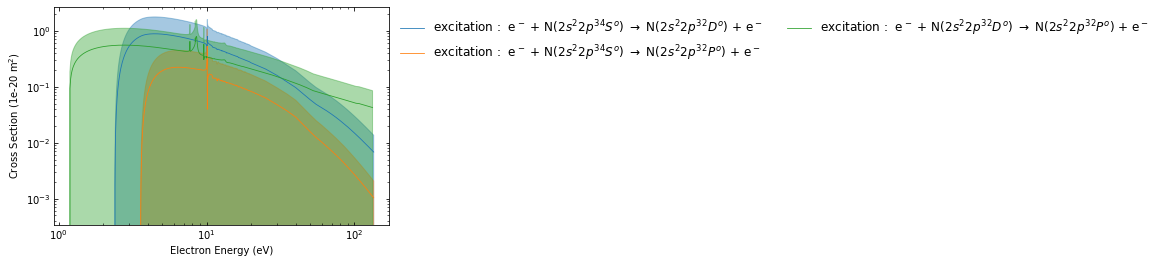

In [31]:
fig, ax = plt.subplots()
plotter.plot_nepc_model(ax, n_eb1.cs, 1E-20,
                        'excitation',
                        plot_param_dict = {'linewidth':.8}, 
                        #xlim_param_dict = {'left': 0.01, 'right': 120.0}, 
                        ylog=True, xlog=True, max_plots=4, width=8, height=4) 

In [20]:
cnx.close()